In [389]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import vectorize
import json
import time
import feature_engineering_func as fe_func
import cnn_func
import ensemble_method_func as em_func
from sklearn.model_selection import train_test_split

In [390]:
category = "cat_word_ems"
filepath = "cat.ndjson"
df = pd.read_json(filepath,lines=True)


In [391]:
fe_func.ensemble_function_for_feature_engineering_(df,category,30000,'word')
#this creates new file in data folder "./data/MY_feature_{}.pkl".format(category)
#if you want to work on image prediction run following:
# fe_func.feature_engineering_ensemble(df,category,30000,'word')

C:\Users\srini\feature_engineering_func.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  1: filtered out data where Ymax is greater than 1.5


--- 639.8304665088654 seconds ---


In [392]:
df_final = fe_func.The_feature_engineering__for_CNN(df,category,30000,'country')
#this creates new file in data folder "./data/{}_15.pkl".format(category)
#if you want to work on image prediction run following:
# df_final = fe_func.feature_engineering_CNN(df,category,30000,'word')

C:\Users\srini\feature_engineering_func.py:338: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dx = [float(df_cf.drawing[index][stroke][1][-1] - df_cf.drawing[index][stroke][1][0]) \
C:\Users\srini\feature_engineering_func.py:339: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  for stroke in xrange(df_cf.stroke_number[index])]
C:\Users\srini\feature_engineering_func.py:340: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dy = [float(df_cf.drawing[index][stroke][0][-1] - df_cf.drawing[index][stroke][0][0]) \
C:\Users\srini\feature_engineering_func.py:341: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a 

KeyError: 'countrycode'

In [ ]:
df_airplane = pd.read_pickle('image.pkl')
df_icecream = pd.read_pickle('image.pkl') #image recognition
df_cloud = pd.read_pickle('image.pkl')
df_baseball = pd.read_pickle('image.pkl')

In [ ]:
ip_model,X_tr,y_tr,X_te,y_te = cnn_func.CNN_image_recognition(df_airplane,df_icecream,df_cloud,df_baseballbat,sample=30000,binary=False,\
                        convlayer =64,neuron =100, batchsize =128, epoch =20)

In [ ]:
score = ip_model.evaluate(X_te,y_te)
print score

In [ ]:
df_airplane = pd.read_pickle('country_CNN.pkl')
df_icecream = pd.read_pickle('country_CNN.pkl') #country prediction
df_cloud = pd.read_pickle('country_CNN.pkl')
df_baseballbat = pd.read_pickle('country_CNN.pkl')

In [358]:
cp_model,X_tr2,y_tr2,X_te2,y_te2 = cnn_func.CNN_country_prediction(df_airplane,df_icecream,df_cloud,df_baseballbat,sample=30000,limit=8000,
                                binary=False, convlayer =64,neuron =100, \
                                            batchsize =128, epoch =30)

AttributeError: module 'cnn_func' has no attribute 'CNN_country_prediction'

In [ ]:
score2 = cp_model.evaluate(X_te2,y_te2)
print "\nCNN Country prediction accuracy: {} percent".format(score2[1]*100)

In [ ]:
df_airplane_en = pd.read_pickle('country_ems.pkl')
df_icecream_en = pd.read_pickle('country_ems.pkl') #country predict using esemble method
df_cloud_en = pd.read_pickle('country_ems.pkl')
df_baseballbat_en = pd.read_pickle('country_ems.pkl')

In [ ]:
new_df,Y,df_US,df_BR,df_RU,df_KR = em_func.data_preparer_ensemble(df_airplane,df_icecream,df_cloud, df_baseballbat lbl = 'countrycode', \
                                                        countries=['US','BR','RU','KR'],\
                                     words=['airplane','ice cream','cloud','baseball bat',sample=30000, limit = 8000)

In [ ]:
X_tr3,X_te3,y_tr3,y_te3 =train_test_split(new_df,Y,test_size = 0.15, \
                                                    random_state=831713, stratify = Y)

In [ ]:
xgb =XGB.XGBClassifier(max_depth=1, n_estimators=1000, learning_rate=0.2)
xgb.fit(np.array(X_tr3),np.array(y_tr3))
score = xgb.score(np.array(X_te3),np.array(y_te3))
print "XGBoost Country prediction accuracy: {} percent".format(score*100)

In [ ]:
xgb_test = XGB.XGBClassifier()
parameters ={'max_depth':[1], 'n_estimators':[1000,1500,2000],'learning_rate':[0.1,0.2]}
Gsearch = GridSearchCV(xgb,parameters)

In [ ]:
start_time = time.time()
Gsearch.fit(X_tr3,y_tr3)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
Gsearch.best_estimator_

In [ ]:
imp = [X_te3.columns[i] for i in ind]


In [ ]:
imp[-15:]


In [ ]:
df_airplane_en2 = pd.read_pickle('image_ems.pkl')
df_icecream_en2 = pd.read_pickle('image_ems.pkl') #image prediction using esemble method
df_cloud_en2 = pd.read_pickle('image_ems.pkl')
df_baseballbat_en2 = pd.read_pickle('image_ems.pkl')

In [ ]:
X2,Y2 = em_func.data_preparer_ensemble(df_airplane_en2,df_icecream_en2, df_cloud_en2,df_baseballbat_en2 , \
                                          lbl = 'word', countries=['US','BR','RU','KR'],\
                                                     words=['airplane','ice cream','cloud','baseball bat'],\
                                                            sample=30000, limit = 8000)

In [ ]:
X_tr4,X_te4,y_tr4,y_te4 =train_test_split(X2,Y2,test_size = 0.15, \
                                                    random_state=831713, stratify = Y2)

In [ ]:
xgb_test2 = XGB.XGBClassifier()
parameters ={'max_depth':[1], 'n_estimators':[5000],'learning_rate':[0.25,0.5]}
Gsearch2 = GridSearchCV(xgb_test2,parameters)

In [ ]:
start_time = time.time()
Gsearch2.fit(X_tr4,y_tr4)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
Gsearch2.best_estimator_

In [ ]:
ind2 = np.argsort(xgb2.feature_importances_)
imp2 = [X_te4.columns[i] for i in ind2]

In [ ]:
imp2[-15:]

In [ ]:
airplane = np.load('airplane.npy')
icecream = np.load('ice cream.npy')
cloud = np.load('cloud.npy')

print(airplane.shape)
print(icecream.shape)
print(cloud.shape)

In [ ]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

In [ ]:
# add a column with labels
airplane = np.c_[airplane, np.zeros(len(airplane))]
icecream = np.c_[icecream, np.ones(len(icecream))]
cloud = np.c_[cloud, 2*np.ones(len(cloud))]

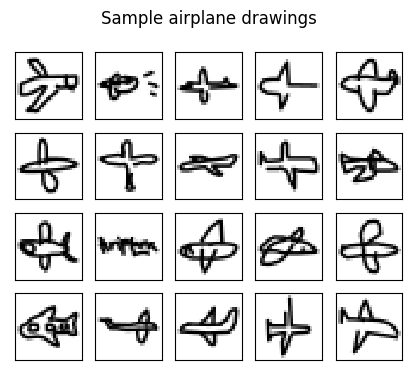

In [333]:
plot_samples(airplane, title='Sample airplane drawings\n')

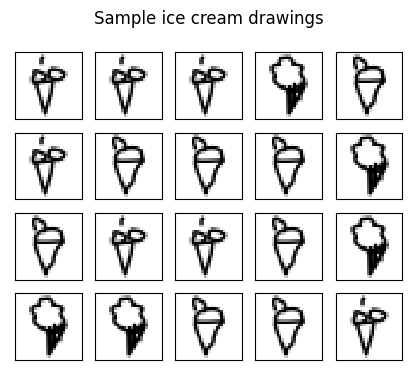

In [334]:

plot_samples(icecream, title='Sample ice cream drawings\n')


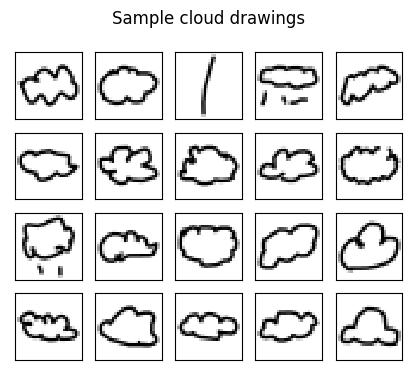

In [335]:
plot_samples(cloud, title='Sample cloud drawings\n')

In [337]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((airplane[:5000,:-1], icecream[:5000,:-1], cloud[:5000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((airplane[:5000,-1], icecream[:5000,-1], cloud[:5000,-1],), axis=0).astype('float32') 

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split, since I want to start by training the models on 5'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [338]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [344]:
# define the CNN model
def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(6,3,3,input_shape=(28,28,3),activation='relu'))
    model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(28,28,3), padding='same'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(28, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [346]:
%%time
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=10, batch_size=400)
# Final evaluation of the model
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/10


ValueError: in user code:

    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\srini\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_97" is incompatible with the layer: expected shape=(None, 28, 28, 3), found shape=(None, 1, 28, 28)
